<a href="https://colab.research.google.com/github/dhairya-1105/Encryptix/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv('/content/train_data.txt',sep=':::',names=['movie_title', 'genre', 'desc'], engine='python')
test_df=pd.read_csv('/content/test_data_solution.txt',sep=':::',names=['movie_title', 'genre', 'desc'], engine='python')

In [ ]:
train_df.shape

(54214, 3)

In [ ]:
train_df.head()

,movie_title,genre,desc
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
# train_df['genre'].unique()
train_df['genre'].value_counts()

genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [ ]:
train_df.isnull().sum()

movie_title    0
genre          0
desc           0
dtype: int64

In [ ]:
test_df.isnull().sum()

movie_title    0
genre          0
desc           0
dtype: int64

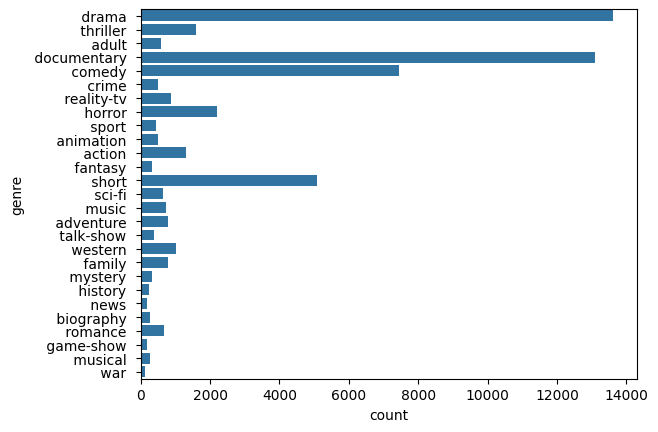

In [ ]:
sns.countplot(y='genre',data=train_df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['genre']=le.fit_transform(train_df['genre'])
test_df['genre']=le.fit_transform(test_df['genre'])

In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
  text=text.lower()
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  # Remove punctuation and special characters
  text = re.sub(r"[^a-zA-Z\s]", '', text)
  words = nltk.word_tokenize(text)
  stopwords = nltk.corpus.stopwords.words('english')
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]
  text = " ".join([i for i in words if i not in stopwords and len(i) > 2 and i.isalpha()])
  return text

In [ ]:
train_df['new_desc']=train_df['desc'].apply(remove_stopwords)
test_df['new_desc']=test_df['desc'].apply(remove_stopwords)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
#First trying TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train=tfidf.fit_transform(train_df['new_desc'])
x_test=tfidf.transform(test_df['new_desc'])

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,train_df['genre'],test_size=0.2,random_state=25)

In [ ]:
model1=MultinomialNB()
model1.fit(X_train,y_train)
y_1=model1.predict(X_val)
accuracy=accuracy_score(y_val,y_1)
print(accuracy)
print(classification_report(y_val,y_1))

0.5155399797104122
              precision    recall  f1-score   support

           0       0.54      0.03      0.05       278
           1       0.60      0.03      0.05       110
           2       0.75      0.06      0.11       145
           3       0.00      0.00      0.00       115
           4       0.00      0.00      0.00        66
           5       0.53      0.43      0.47      1519
           6       0.00      0.00      0.00       106
           7       0.56      0.88      0.69      2597
           8       0.45      0.84      0.59      2743
           9       0.00      0.00      0.00       151
          10       0.00      0.00      0.00        61
          11       1.00      0.03      0.06        32
          12       0.00      0.00      0.00        48
          13       0.71      0.28      0.40       406
          14       1.00      0.01      0.03       140
          15       0.00      0.00      0.00        56
          16       0.00      0.00      0.00        67
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model2=LogisticRegression(max_iter=1000)
model2.fit(X_train,y_train)
y_2=model2.predict(X_val)
accuracy=accuracy_score(y_val,y_2)
print(accuracy)
print(classification_report(y_val,y_2))

0.5853546066586738
              precision    recall  f1-score   support

           0       0.52      0.22      0.31       278
           1       0.78      0.29      0.42       110
           2       0.72      0.19      0.30       145
           3       0.57      0.03      0.07       115
           4       0.00      0.00      0.00        66
           5       0.53      0.59      0.56      1519
           6       0.22      0.02      0.03       106
           7       0.67      0.85      0.75      2597
           8       0.54      0.79      0.65      2743
           9       0.50      0.09      0.16       151
          10       0.00      0.00      0.00        61
          11       0.79      0.34      0.48        32
          12       0.00      0.00      0.00        48
          13       0.65      0.59      0.62       406
          14       0.70      0.46      0.56       140
          15       0.75      0.05      0.10        56
          16       0.00      0.00      0.00        67
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# #Improving through gridsearch crossvalidation

# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
#Try SVC, then use word2vec and try multinomialNB,LogisticReg,S

In [ ]:
# best_C = grid_search.best_params_['C']
# model2_new=LogisticRegression(C=best_C,max_iter=1000)
# model2_new.fit(X_train,y_train)
# y_2_new=model2_new.predict(X_val)
# accuracy=accuracy_score(y_val,y_2_new)
# print(accuracy)
# print(classification_report(y_val,y_2_new))

In [ ]:
# model3=SVC()
# model3.fit(X_train,y_train)
# y_3=model3.predict(X_val)
# accuracy=accuracy_score(y_val,y_3)
# print(accuracy)
# print(classification_report(y_val,y_3))

In [ ]:
#Trying word2vec

import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

processed_desc=[simple_preprocess(desc) for desc in train_df['new_desc'] ]
model = Word2Vec(processed_desc, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
def description_to_vectors(description, model):
    vectors = []
    for word in description:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = np.array([description_to_vectors(desc, model) for desc in processed_desc])
y=train_df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# print(y_train)

In [ ]:
# model3=LogisticRegression(max_iter=1000)
# model3.fit(X_train,y_train)
# y1_w=model3.predict(X_test)
# accuracy=accuracy_score(y1_w,y_test)
# print(accuracy)
# print(classification_report(y1_w,y_test))

In [ ]:
y_test=test_df['genre']
y_final=model2.predict(x_test)
accuracy=accuracy_score(y_test,y_final)
print(accuracy)
print(classification_report(y_test,y_final))

0.5841512915129151
              precision    recall  f1-score   support

           0       0.50      0.27      0.35      1314
           1       0.63      0.22      0.33       590
           2       0.66      0.17      0.27       775
           3       0.47      0.04      0.08       498
           4       0.00      0.00      0.00       264
           5       0.53      0.58      0.56      7446
           6       0.39      0.03      0.06       505
           7       0.66      0.85      0.75     13096
           8       0.54      0.79      0.64     13612
           9       0.52      0.08      0.14       783
          10       0.60      0.04      0.07       322
          11       0.88      0.52      0.66       193
          12       0.00      0.00      0.00       243
          13       0.66      0.57      0.61      2204
          14       0.65      0.40      0.50       731
          15       0.18      0.01      0.01       276
          16       0.00      0.00      0.00       318
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
